<a href="https://colab.research.google.com/github/Rehima1/Stock-Price-Prediction/blob/main/StockPricePrediction_Meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

df = pd.read_csv('META.csv')

In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151600,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200
...,...,...,...,...,...,...,...
3068,2024-07-31,471.019989,476.500000,466.750000,474.829987,474.829987,24285800
3069,2024-08-01,521.000000,527.169983,492.100006,497.739990,497.739990,43083100
3070,2024-08-02,489.000000,501.149994,476.149994,488.140015,488.140015,24044700
3071,2024-08-05,451.350006,483.480011,450.799988,475.730011,475.730011,21396200


In [19]:
df = df[['Date','Close']]
df

,Date,Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999
...,...,...
3068,2024-07-31,474.829987
3069,2024-08-01,497.739990
3070,2024-08-02,488.140015
3071,2024-08-05,475.730011


In [20]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year = year, month= month, day= day )

df['Date'] = df['Date'].apply(str_to_datetime)
df

<ipython-input-20-43b143d3c148>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date,Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999
...,...,...
3068,2024-07-31,474.829987
3069,2024-08-01,497.739990
3070,2024-08-02,488.140015
3071,2024-08-05,475.730011


In [21]:
df.index = df.pop('Date')


In [22]:
df

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999
...,...
2024-07-31,474.829987
2024-08-01,497.739990
2024-08-02,488.140015


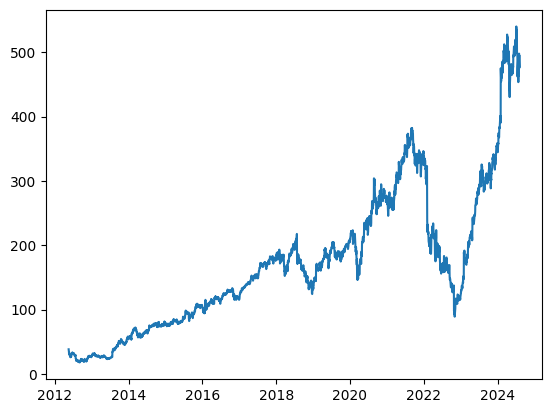

In [23]:
import matplotlib.pyplot as plt
plt.plot(df.index , df['Close'])

In [24]:
import numpy as np
import pandas as pd
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


In [37]:
windowed_df = df_to_windowed_df(df,
                                '2012-05-23',
                                '2024-03-08',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2012-05-23,38.230000,34.029999,31.000000,32.000000
1,2012-05-24,34.029999,31.000000,32.000000,33.029999
2,2012-05-25,31.000000,32.000000,33.029999,31.910000
3,2012-05-29,32.000000,33.029999,31.910000,28.840000
4,2012-05-30,33.029999,31.910000,28.840000,28.190001
...,...,...,...,...,...
2962,2024-03-04,484.019989,490.130005,502.299988,498.190002
2963,2024-03-05,490.130005,502.299988,498.190002,490.220001
2964,2024-03-06,502.299988,498.190002,490.220001,496.089996
2965,2024-03-07,498.190002,490.220001,496.089996,512.190002


In [38]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_np = windowed_dataframe.to_numpy()

  dates = df_np[: ,0]
  middle_matrix = df_np[: ,1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1 ))
  y = df_np[: , -1]

  return dates, X.astype(float), y.astype(float)

dates, X,y = windowed_df_to_date_X_y(windowed_df)

dates.shape , X.shape, y.shape

((2967,), (2967, 3, 1), (2967,))

<function matplotlib.pyplot.show(close=None, block=None)>

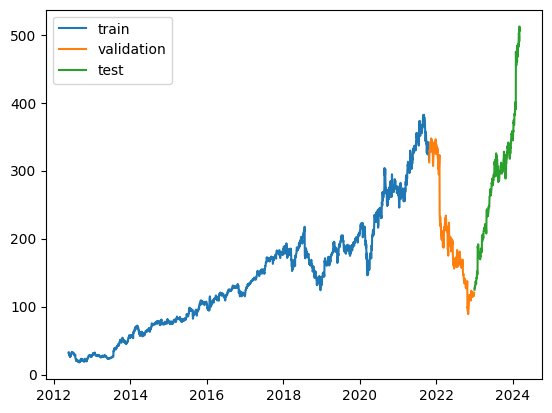

In [39]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates)* .9 )

dates_tain ,X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val ,X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test ,X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_tain,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test , y_test)

plt.legend(['train', 'validation', 'test'])
plt.show

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers



model = Sequential([layers.Input((3, 1)),
                     layers.LSTM(64),
                     layers.Dense(32 , activation = 'relu'),
                     layers.Dense(32 , activation = 'relu'),
                     layers.Dense(1)])

model.compile(loss = 'mse', optimizer = Adam(learning_rate= 0.001), metrics = ['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 100)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 26962.3105 - mean_absolute_error: 139.3937 - val_loss: 33461.0664 - val_mean_absolute_error: 166.0859
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11651.6123 - mean_absolute_error: 79.2530 - val_loss: 2902.2324 - val_mean_absolute_error: 31.6336
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 665.0080 - mean_absolute_error: 10.1651 - val_loss: 251.7489 - val_mean_absolute_error: 10.3228
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.5789 - mean_absolute_error: 4.0923 - val_loss: 77.7350 - val_mean_absolute_error: 5.6302
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 44.3971 - mean_absolute_error: 4.1347 - val_loss: 80.4052 - val_mean_absolute_error: 5.6170
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.2394 - mean_absolute_error: 3.0033 - val_loss: 76.0275 - val_mean_absolute_error: 5.3394
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.6474 - mean

KeyboardInterrupt: 

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


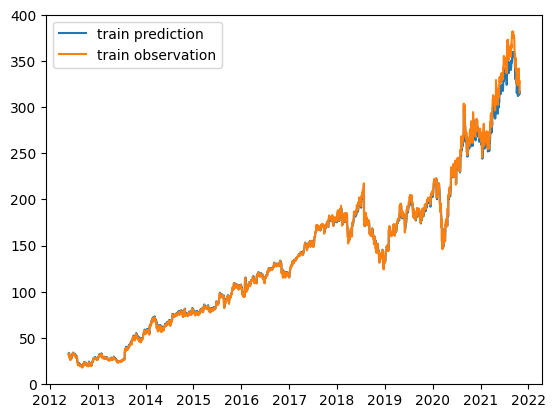

In [41]:
train_prediction = model.predict(X_train).flatten()

plt.plot(dates_tain, train_prediction)
plt.plot(dates_tain, y_train)
plt.legend(["train prediction",'train observation'])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


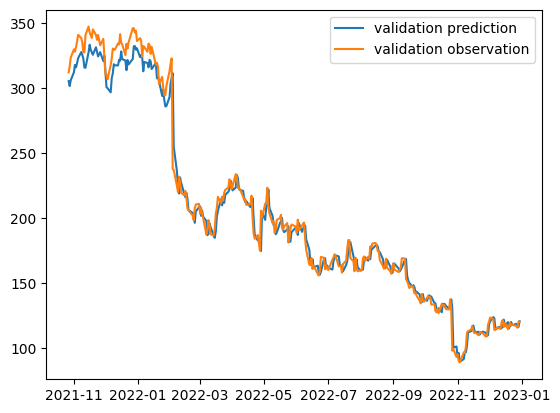

In [42]:
val_prediction = model.predict(X_val).flatten()

plt.plot(dates_val, val_prediction)
plt.plot(dates_val, y_val)
plt.legend(["validation prediction",'validation observation'])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


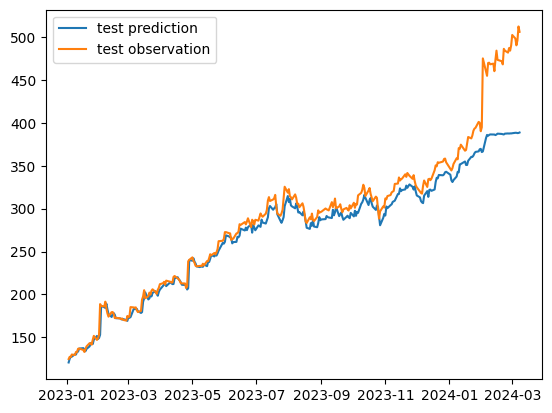

In [43]:
test_prediction = model.predict(X_test).flatten()

plt.plot(dates_test, test_prediction)
plt.plot(dates_test, y_test)
plt.legend(["test prediction",'test observation'])

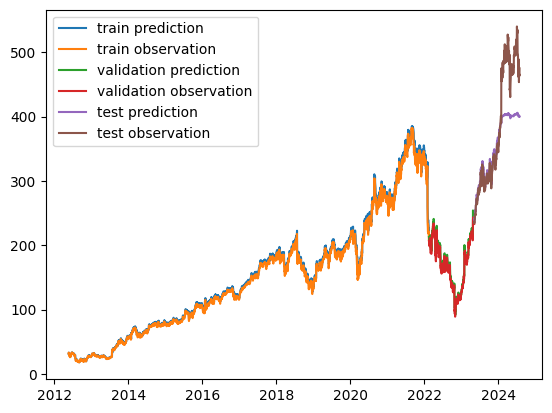

In [33]:
plt.plot(dates_tain, train_prediction)
plt.plot(dates_tain, y_train)

plt.plot(dates_val, val_prediction)
plt.plot(dates_val, y_val)

plt.plot(dates_test, test_prediction)
plt.plot(dates_test, y_test)
plt.legend(["train prediction",'train observation',
            "validation prediction",'validation observation',
            "test prediction",'test observation'])

In [ ]:
from copy import deepcopy

recrusive_pred = []
recursive_date = np.concatenate([dates_val, dates_test])

for target_date in recursive_date:
  last_window = deepcopy(X_train[-1])
  next_pred = model.predict(np.array([last_window])).flatten()
  recrusive_pred.append(next_pred)

  last_window[-1] = next_pred
